In [39]:
import pandas as pd
# Load the dataset
file_path = 'C:/Users/civin/datasetkdd.csv'
data = pd.read_csv(file_path)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
# Load your dataset
df = pd.read_csv('C:/Users/civin/datasetkdd.csv')


In [65]:
# Identify string columns to encode
string_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each string column
for col in string_columns:
    df[col] = le.fit_transform(df[col])
# Identify string columns to encode
string_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each string column
for col in string_columns:
    df[col] = le.fit_transform(df[col])
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data (excluding the target column if needed)
# Assuming the last column is the target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

X_normalized = scaler.fit_transform(X)


In [66]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)


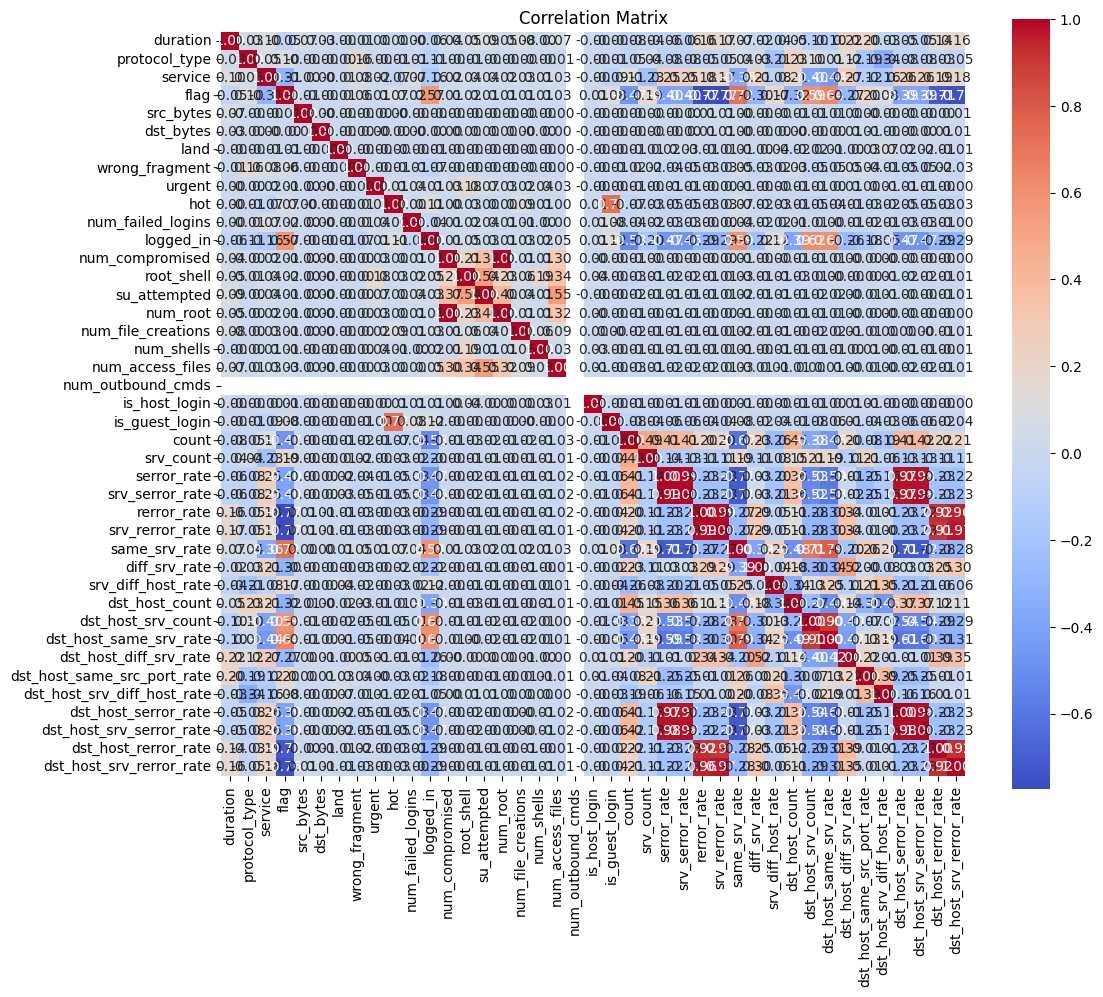

Top 20 Features by Mutual Information:
4     0.541904
5     0.436641
2     0.431971
3     0.327986
29    0.321319
28    0.312195
32    0.299595
33    0.274221
34    0.258680
11    0.250097
37    0.232658
22    0.232089
24    0.229828
38    0.227749
25    0.219161
36    0.169120
31    0.128594
35    0.123764
30    0.100554
40    0.064310
dtype: float64


In [68]:
# Calculate correlation matrix
corr_matrix = X_normalized_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
# Calculate mutual information
mutual_info = pd.Series(mutual_info_regression(X_normalized_df, y))

# Select the top 20 features
top_features = mutual_info.nlargest(20)

# Print the top features
print("Top 20 Features by Mutual Information:")
print(top_features)


In [22]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
top_features = [
    'src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_srv_count', 'flag', 
    'count', 'dst_host_same_srv_rate', 'diff_srv_rate', 'dst_host_diff_srv_rate', 
    'service', 'protocol_type', 'dst_host_same_src_port_rate', 'logged_in', 
    'dst_host_rerror_rate'
]

X_top_features = X[top_features].copy()

# LabelEncoder for categorical columns
label_encoder = LabelEncoder()
X_top_features['flag'] = label_encoder.fit_transform(X_top_features['flag'])
X_top_features['service'] = label_encoder.fit_transform(X_top_features['service'])
X_top_features['protocol_type'] = label_encoder.fit_transform(X_top_features['protocol_type'])

# Normalize
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_top_features), columns=top_features)
X_normalized.head()


,src_bytes,dst_bytes,same_srv_rate,dst_host_srv_count,flag,count,dst_host_same_srv_rate,diff_srv_rate,dst_host_diff_srv_rate,service,protocol_type,dst_host_same_src_port_rate,logged_in,dst_host_rerror_rate
0,3.558064e-07,0.000000e+00,1.00,0.098039,0.9,0.003914,0.17,0.00,0.03,0.289855,0.5,0.17,0.0,0.05
1,1.057999e-07,0.000000e+00,0.08,0.003922,0.9,0.025440,0.00,0.15,0.60,0.637681,1.0,0.88,0.0,0.00
2,0.000000e+00,0.000000e+00,0.05,0.101961,0.5,0.240705,0.10,0.07,0.05,0.710145,0.5,0.00,0.0,0.00
3,1.681203e-07,6.223962e-06,1.00,1.000000,0.9,0.009785,1.00,0.00,0.00,0.347826,0.5,0.03,1.0,0.00
4,1.442067e-07,3.206260e-07,1.00,1.000000,0.9,0.058708,1.00,0.00,0.00,0.347826,0.5,0.00,1.0,0.00


In [26]:
from sklearn.model_selection import train_test_split
labelencoder = LabelEncoder()
# Assume 'class' is the target column 'anomaly ' or 'normal'
X = data.drop(columns=['class'])  
y = label_encoder.fit_transform(data['class'])
# 80:20 ratio divide
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)